<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_5_1_1_k_means_m%C3%A9thode_du_coude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Création d'un modèle de k means

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Données

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


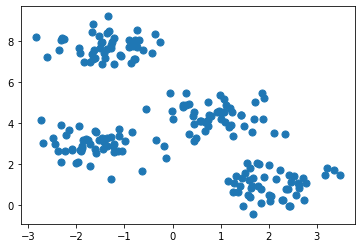

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=200, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

## Modèle k means


In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

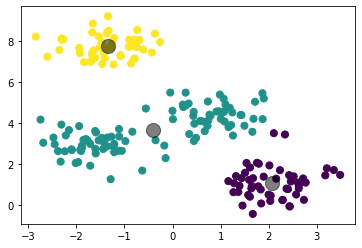

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# k optimal

## Inerties

L'inertie est définie comme la moyenne des distances au carré entre les observations et leurs centroïdes.

In [5]:
kmeans.inertia_

345.89529436359777

**Question** retrouver le résultat en faisant un calcul à la main.

In [29]:
c1 =[]
c2=[]
for elt in X :
    c1.append((elt-centers)**2)
for elt in y_kmeans :
    c2.append((elt - centers)**2)   
dist1 = np.sqrt(c1+c2)
#dist1
savg = (sum(dist1)/len(dist1))**2

avg = sum(savg)/len(savg)
avg

array([ 2.93702894, 12.25580974])

## Méthode du coude

In [27]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

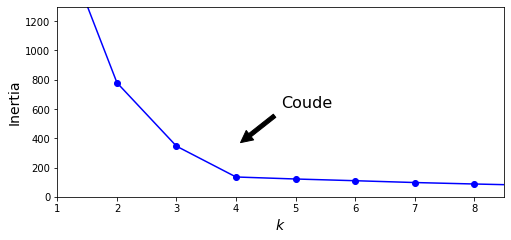

In [28]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.annotate('Coude',
             xy=(4, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()